In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
sidelink_data = pd.read_csv('sidelink_dataframe.csv')

# Check for any missing values and decide how to handle them
# For example, if missing values are not significant, we could drop them or fill them with median/mean
sidelink_data = sidelink_data.dropna()

# We'll select a subset of features that are most relevant for anomaly detection
features = sidelink_data[['SNR', 'RSRP', 'RSSI', 'NOISE POWER', 'RX_GAIN']]  # Example feature selection

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


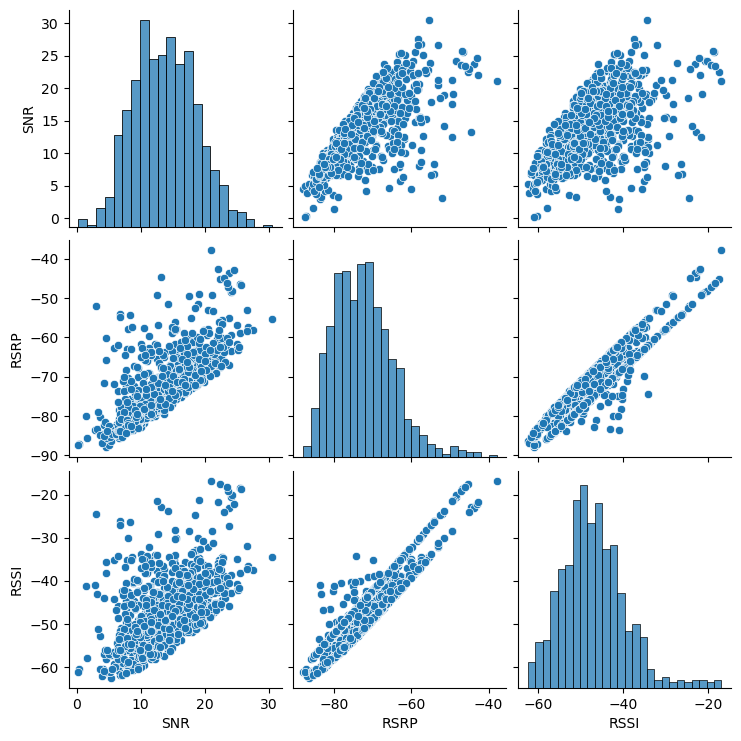

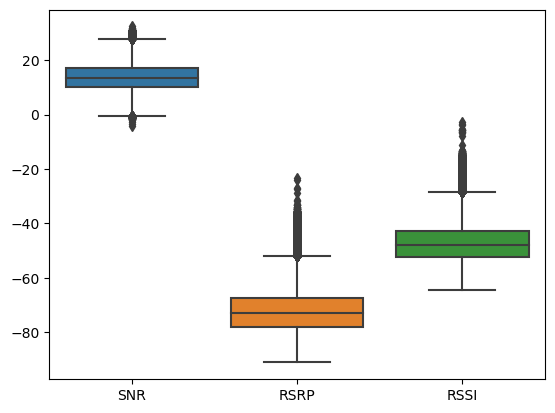

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(sidelink_data[['SNR', 'RSRP', 'RSSI']].sample(1000))  # Using a sample for large datasets
plt.show()

# Boxplot to visualize potential outliers in features
sns.boxplot(data=sidelink_data[['SNR', 'RSRP', 'RSSI']])
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
sidelink_data.dropna(inplace=True)

# Standardization of the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sidelink_data[['SNR', 'RSRP', 'RSSI']])


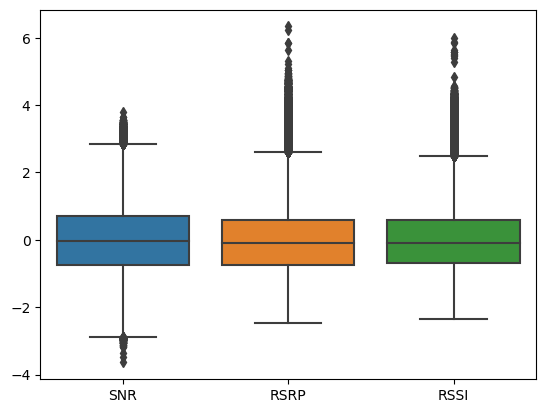

In [6]:
# Visualize the standardized features
sns.boxplot(data=pd.DataFrame(scaled_features, columns=['SNR', 'RSRP', 'RSSI']))
plt.show()


In [7]:
from sklearn.ensemble import IsolationForest

# Initialize and fit the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(scaled_features)

IsolationForest(contamination=0.01, random_state=42)

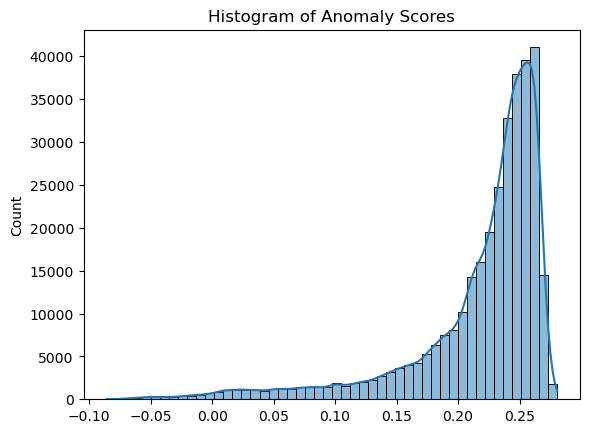

In [8]:
# Plot the histogram of anomaly scores the model assigned to each instance
scores = iso_forest.decision_function(scaled_features)
sns.histplot(scores, bins=50, kde=True)
plt.title('Histogram of Anomaly Scores')
plt.show()


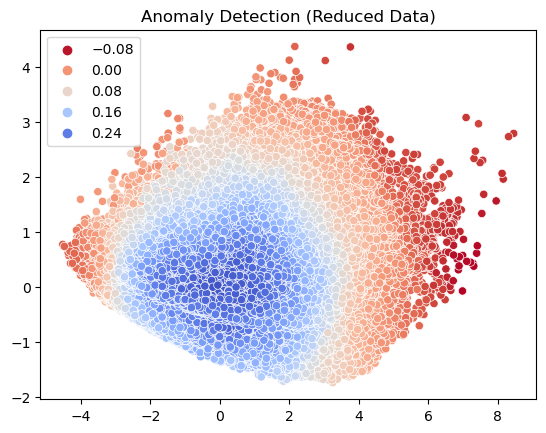

In [9]:
from sklearn.decomposition import PCA

# Reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

# Plot the reduced data and color the points based on their anomaly score
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=scores, palette="coolwarm_r")
plt.title('Anomaly Detection (Reduced Data)')
plt.show()


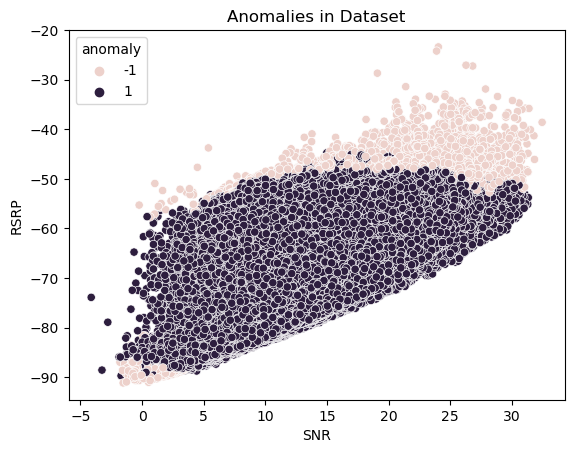

In [10]:
# Predict if a particular instance is an anomaly (-1 for anomalies)
sidelink_data['anomaly'] = iso_forest.predict(scaled_features)

# Plot the anomalies in the dataset
sns.scatterplot(x='SNR', y='RSRP', hue='anomaly', data=sidelink_data)
plt.title('Anomalies in Dataset')
plt.show()
